In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/000/940/original/netflix.csv")

In [3]:
df.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB



#####    Let's try to remove null values from duration column

In [5]:
df[df["duration"].isna()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...


In [6]:
# the only null values have duration in their ratings so simply copy from rating and assign rating null values
def impute_duration(x):
    if pd.isna(x["duration"]) == True:
        x["duration"] = x["rating"]
        x["listed_in"] = "Comedies"
        x["rating"] = np.nan
    return x

df = df.apply(impute_duration,axis = 1)

In [7]:
df[df["duration"].isna()].shape[0]

0

In [8]:
# in dutarion column the values are like int mins for movies and int seasons, so lets do split
# which only shows run time for movies and no.of seasons for tv shows
# hence convert to int type
df["duration"] = df["duration"].apply(lambda x: str(x).split(" ")[0])
df["duration"] = df["duration"].astype(int)

#####  lets convert data added column to a type of datetime

In [9]:
df["date_added"] = pd.to_datetime(df["date_added"])

In [10]:
df[df["date_added"].isna()].shape[0]
# there are 10 null values in this colums

10

##### impute null values with the most occured date from this column

In [11]:
def impute_date(x):
    if pd.isnull(x["date_added"]) == True:
        x["date_added"] = df["date_added"].describe().top
    return x

In [36]:
import warnings
warnings.filterwarnings('ignore')

In [12]:
df = df.apply(impute_date,axis = 1)

C:\Users\borra\AppData\Local\Temp\ipykernel_10740\4103306053.py:3: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  x["date_added"] = df["date_added"].describe().top
C:\Users\borra\AppData\Local\Temp\ipykernel_10740\4103306053.py:3: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  x["date_added"] = df["date_added"].describe().top
C:\Users\borra\AppData\Local\Temp\ipykernel_10740\4103306053.py:3: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence th

In [13]:
df[df["date_added"].isna()].shape[0]
#all null values removed from this column

0

##### lets convert country, cast, director and listed_in columns to str type

In [14]:
df["country"] = df["country"].astype(str)
df["cast"] = df["cast"].astype(str)
df["director"] = df["director"].astype(str)
df["listed_in"] = df["listed_in"].astype(str)

In [15]:
df[df["rating"].isna()].shape[0]

7

##### only 7 rows have rating null so impute with most occured rating from this column

In [16]:
def impute_rating(x):
    if pd.isna(x["rating"]) == True:
        x["rating"] = df["rating"].describe().top
    return x

df = df.apply(impute_rating,axis = 1)

In [17]:
df[df["rating"].isna()].shape[0]

0

In [18]:
# df["type"].value_counts()

##### Take movies into a seperate df_movies dataframe and tv shows into df_series dataframe

In [19]:
df_movies = df[df["type"] == "Movie"]
df_movies.shape

(6131, 12)

In [20]:
df_series = df[df["type"] != "Movie"]
df_series.shape

(2676, 12)

In [21]:
# df_movies.info()
director_missing = df_movies[df_movies["director"] == "nan"].shape[0]
director_missing_country = df_movies[(df_movies["director"] == "nan") & (df_movies["country"] == "nan")].shape[0]
director_missing_country_cast = df_movies[(df_movies["director"] == "nan") & (df_movies["country"] == "nan") & (df_movies["cast"] == "nan")].shape[0]
director_missing_country_cast_listed_in = df_movies[(df_movies["director"] == "nan") & (df_movies["country"] == "nan") & (df_movies["cast"] == "nan") & (df_movies["listed_in"] == "nan")].shape[0]
print(director_missing, director_missing_country,director_missing_country_cast,director_missing_country_cast_listed_in)

188 59 17 0


##### above output shows
    188 rows director missing
    59 rows have both director and country missing
    17 rows have director and country and cast missing
    0 rows have director and country and cast missing and genre missing

In [22]:
director_missing1 = df_series[df_series["director"] == "nan"].shape[0]
# director_missing_country1 = df_series[(df_series["director"] == "nan") & (df_series["country"] == "nan")].shape[0]
print(director_missing1)

2446


##### above output shows
    2446 rows director missing out of 2676 ,,  so in tv shows data more than 90% of director data missing
    hence we can drop/neglect the directors data for tv series
  

In [23]:
movie_country_na = df_movies[df_movies["country"] == "nan"].shape[0]
tvshow_country_na = df_series[df_series["country"] == "nan"].shape[0]
movie_cast_na = df_movies[df_movies["cast"] == "nan"].shape[0]
tvshow_cast_na = df_series[df_series["cast"] == "nan"].shape[0]
movie_genre_na = df_movies[df_movies["listed_in"] == "nan"].shape[0]
tvshow_genre_na = df_series[df_series["listed_in"] == "nan"].shape[0]
print(movie_country_na,tvshow_country_na,movie_cast_na, tvshow_cast_na, movie_genre_na, tvshow_genre_na )

440 391 475 350 0 0


##### above output shows
    no missing vales in genre

### Work on Movies data(df_movies)

##### As observed from data director, cast, country and listed_in contains multiple values seperated by columns
    hence split these columns and use explode to make single value column

In [24]:
df_movies.loc[:,"cast"] = df_movies.loc[:,"cast"].str.split(",")
df_movies.loc[:,"country"] = df_movies["country"].str.split(",")
df_movies.loc[:,"director"] = df_movies["director"].str.split(",")
df_movies["listed_in"] = df_movies["listed_in"].str.split(",")

C:\Users\borra\AppData\Local\Temp\ipykernel_10740\1637029210.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_movies.loc[:,"cast"] = df_movies.loc[:,"cast"].str.split(",")
C:\Users\borra\AppData\Local\Temp\ipykernel_10740\1637029210.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_movies.loc[:,"country"] = df_movies["country"].str.split(",")
C:\Users\borra\AppData\Local\Temp\ipykernel_10740\1637029210.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

In [50]:
df_movies.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,[Kirsten Johnson],[nan],[United States],2021-09-25,2020,PG-13,90,[Documentaries],"As her father nears the end of his life, filmm..."
6,s7,Movie,My Little Pony: A New Generation,"[Robert Cullen, José Luis Ucha]","[Vanessa Hudgens, Kimiko Glenn, James Marsde...",[nan],2021-09-24,2021,PG,91,[Children & Family Movies],Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,[Haile Gerima],"[Kofi Ghanaba, Oyafunmike Ogunlano, Alexandr...","[United States, Ghana, Burkina Faso, United...",2021-09-24,1993,TV-MA,125,"[Dramas, Independent Movies, International M...","On a photo shoot in Ghana, an American model s..."
9,s10,Movie,The Starling,[Theodore Melfi],"[Melissa McCarthy, Chris O'Dowd, Kevin Kline...",[United States],2021-09-24,2021,PG-13,104,"[Comedies, Dramas]",A woman adjusting to life after a loss contend...
12,s13,Movie,Je Suis Karl,[Christian Schwochow],"[Luna Wedler, Jannis Niewöhner, Milan Pesche...","[Germany, Czech Republic]",2021-09-23,2021,TV-MA,127,"[Dramas, International Movies]",After most of her family is murdered in a terr...


##### thorugh observation found that these values even contain empty spaces hence remove the spaces before using explode from pandas

In [27]:
def remove_spaces(x):
    ans = []
    for i in x:
        if i != '':
            ans.append(i.strip())
    return ans

df_movies["country"] = df_movies["country"].apply(remove_spaces)
df_movies["cast"] = df_movies["cast"].apply(remove_spaces)
df_movies["director"]= df_movies["director"].apply(remove_spaces)
df_movies["listed_in"] = df_movies["listed_in"].apply(remove_spaces)

In [28]:
df_movies = df_movies.explode("cast")
df_movies = df_movies.explode("country")
df_movies = df_movies.explode("director")
df_movies = df_movies.explode("listed_in")

In [29]:
df_movies.shape[0]

145819

In [30]:
df_movies.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,nan,United States,2021-09-25,2020,PG-13,90,Documentaries,"As her father nears the end of his life, filmm..."
6,s7,Movie,My Little Pony: A New Generation,Robert Cullen,Vanessa Hudgens,nan,2021-09-24,2021,PG,91,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
6,s7,Movie,My Little Pony: A New Generation,José Luis Ucha,Vanessa Hudgens,nan,2021-09-24,2021,PG,91,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...


In [31]:
df_movies.groupby("title").ngroups

6131

##### Filling missing values in director column of movies data(df_movies)

In [32]:
# this function is to split the list data and remove if any spaces
def func5(x1):
    vals = x1.split(",")
    ans = []
    for i in vals:
        if i != '':
            ans.append(i.strip())
    return ans

# this function get (2) multi index ex((a,b),(c,d),..) => a is country, b is director and return b if b is not nan
def func6(x2):
    l = len(x2)
    for i in range(l):
        if x2[i][1] != "nan":
            return x2[i][1]
    return "nan"

# this function get index (d)director and return d if d is not nan
def func6_u(nam):
    l = len(nam)
    for i in range(l):
        if nam[i] != "nan":
            return nam[i]
    return "nan"



In [33]:
# 1) try to impute if country is not nan => filling with that country's top director but if no director exists then step 2
# 2) try to impute if cast is not nan => filling with that cast's country's top director but if no director exists then step 3
# 3) try to impute with genre, as no null in genre

def dir_impute(x):
    if x["director"] == "nan":
        if x["country"] != "nan":
            c = func5(x["country"])
            output_d = df_movies.groupby("country")["director"].value_counts().loc[c].sort_values(ascending = False).index
            name_d = func6(output_d)
            if name_d != "nan":
                x["director"] = name_d
                return x
        if x["cast"] != "nan":
            c = func5(x["cast"])
            output_d = df_movies.groupby("cast")["country"].value_counts().loc[c].sort_values(ascending = False).index
            name_d = func6(output_d)
            if name_d != "nan":
                output_d1 = df_movies.groupby("country")["director"].value_counts().loc[name_d].sort_values(ascending = False).index
                name_d1 = func6_u(output_d1)
                if name_d1 != "nan":
                    x["director"] = name_d1
                    return x
        if x["listed_in"] != "nan":
            c = func5(x["listed_in"])
            output_d = df_movies.groupby("listed_in")["director"].value_counts().loc[c].sort_values(ascending = False).index
            name_d = func6(output_d)
            x["director"] = name_d
            return x
    return x
            

##### Take temporary movies data to impute director

In [34]:
df_movies_original = df[df["type"] == "Movie"]
df_movies_original.shape[0]

6131

##### apply dir_impute

In [35]:
df_movies_original = df_movies_original.apply(dir_impute,axis = 1)

In [36]:
# oh.head()
df_movies_original[df_movies_original["director"] == "nan"].shape[0]
# we can now so no null values

0

##### merge df_movies_original(temp data ) with df_movies

In [37]:
df_temp = df_movies_original[["title", "director"]]
df_movies = df_movies.merge(df_temp, on = "title")

In [38]:
# director_x is df_movies director colums so check to see if any nan values 
df_movies.columns

Index(['show_id', 'type', 'title', 'director_x', 'cast', 'country',
       'date_added', 'release_year', 'rating', 'duration', 'listed_in',
       'description', 'director_y'],
      dtype='object')

In [39]:
# fill df_movies nan values with df_movies_original data(i.e directors imputed data)
def fill_d(x):
    if x["director_x"] == "nan":
        x["director_x"] = x["director_y"]
    return x 
df_movies = df_movies.apply(fill_d,axis = 1)

In [40]:
df_movies.drop(columns="director_y",inplace=True)
df_movies.rename(columns = {'director_x':'director'}, inplace = True)

In [41]:
df_movies.shape[0]

145819

In [42]:
df_movies.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [43]:
df_movies.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,nan,United States,2021-09-25,2020,PG-13,90,Documentaries,"As her father nears the end of his life, filmm..."
1,s7,Movie,My Little Pony: A New Generation,Robert Cullen,Vanessa Hudgens,nan,2021-09-24,2021,PG,91,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
2,s7,Movie,My Little Pony: A New Generation,José Luis Ucha,Vanessa Hudgens,nan,2021-09-24,2021,PG,91,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...


In [44]:
df_movies[df_movies["director"] == "nan"].shape[0]
# no nan values directors column

0

##### Filling missing values in country column of movies data(df_movies)

In [45]:
# 1) we have director now, so find that director's top occuring country and fill with that. but if the country is null then step2
# 2) will with top most occuring country

def country_impute(x):
    if x["country"] == "nan":
        c = func5(x["director"])
        output_d = df_movies.groupby("director")["country"].value_counts().loc[c].sort_values(ascending = False).index
        name_d = func6(output_d)
        if name_d == "nan":
            nam1 = df_movies.groupby(["country"])["show_id"].count().sort_values(ascending = False).index[0]
            x["country"] = nam1
            return x
        x["country"] = name_d
    return x
            
        
        

##### Perfom as did for director impute
    apply country_impute
    merge df_movies_original(temp data ) with df_movies
    remove and rename extra cloumns after merge

In [46]:
df_movies_original = df_movies_original.apply(country_impute,axis = 1)

In [47]:
df_movies_original[df_movies_original["country"] == "nan"].shape[0]

0

In [48]:
df_temp = df_movies_original[["title", "country"]]
df_movies = df_movies.merge(df_temp, on = "title")

In [49]:
df_movies.groupby("title").ngroups

6131

In [50]:
def fill_d1(x):
    if x["country_x"] == "nan":
        x["country_x"] = x["country_y"]
    return x 
df_movies = df_movies.apply(fill_d1,axis = 1)

In [51]:
df_movies.drop(columns="country_y",inplace=True)
df_movies.rename(columns = {'country_x':'country'}, inplace = True)

In [52]:
df_movies[df_movies["country"] == "nan"].shape[0]

0

##### Filling missing values in cast column of movies data(df_movies)

In [53]:
# takes list of index and return one if not nan
def fun9(x1):
    ind = x1.index
    for i in ind:
        if i != "nan":
            return [x1.loc[i], i]
    return [0,"nan"]

            
#we get the c1(list of the current row country's), c2(list of the current row genre)
#we then form tuples of c1 * c2, to give to get_group of groupby object
# taking group by of country and listed_in combined and checking for highest count in current row's tuple's
def func10(c1,c2):
    op_pl  = df_movies.groupby(["country", "listed_in"])
    t1 = []
    for i in c1:
        for j in c2:
            t1.append((i,j))
    ans = [0,"nan"]
    for tup in t1:
        output_d = op_pl.get_group((tup[0],tup[1]))["cast"].value_counts().sort_values(ascending=False)
        op_d = fun9(output_d)
        if op_d[0] != 0:
            if op_d[0] > ans[0]:
                ans = op_d
    return ans

# if we get answer from func10 then return else
# fill with that country's top cast
def cast_impute(x):
    if x["cast"] == "nan":
        c1 = func5(x["country"])
        c2 = func5(x["listed_in"])
        op_d = func10(c1,c2)
#         output_d = df_movies.groupby(["country", "listed_in"]).get_group((c1[0],c2[0]))["cast"].value_counts().sort_values(ascending=False).index
#         op_d = fun9(output_d)
        if op_d[1] != "nan":
            x["cast"] = op_d[1]
            return x
        output_d = df_movies.groupby("country")["cast"].value_counts().loc[c1[0]].sort_values(ascending = False).index
        name_d = func6(output_d)
        x["cast"] = name_d
    return x

###### Perfom as did for director impute nad country impute
    apply cast_impute
    merge df_movies_original(temp data ) with df_movies
    remove and rename extra cloumns after merge

In [54]:
df_movies_original = df_movies_original.apply(cast_impute,axis = 1)

In [55]:
df_movies_original[df_movies_original["cast"] == "nan"].shape[0]

0

In [56]:
df_temp = df_movies_original[["title", "cast"]]
df_movies = df_movies.merge(df_temp, on = "title")

In [57]:
def fill_d2(x):
    if x["cast_x"] == "nan":
        x["cast_x"] = x["cast_y"]
    return x 
df_movies = df_movies.apply(fill_d2,axis = 1)

In [58]:
df_movies.drop(columns="cast_y",inplace=True)
df_movies.rename(columns = {'cast_x':'cast'}, inplace = True)

In [59]:
df_movies[df_movies["cast"] == "nan"].shape[0]

0

### work on series data(df_series)

In [60]:
df_series.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,TV Show,Blood & Water,nan,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",nan,2021-09-24,2021,TV-MA,1,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,nan,nan,nan,2021-09-24,2021,TV-MA,1,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."


##### perform split, explode as did for df_movies 

In [61]:
df_series["director"] = df_series["director"].str.split(",")
df_series["cast"] = df_series["cast"].str.split(",")
df_series["country"] = df_series["country"].str.split(",")
df_series["listed_in"] = df_series["listed_in"].str.split(",")

In [62]:
df_series["director"] = df_series["director"].apply(remove_spaces)
df_series["cast"] = df_series["cast"].apply(remove_spaces)
df_series["country"] = df_series["country"].apply(remove_spaces)
df_series["listed_in"] = df_series["listed_in"].apply(remove_spaces)

In [63]:
df_series = df_series.explode("director")
df_series = df_series.explode("cast")
df_series = df_series.explode("country")
df_series = df_series.explode("listed_in")

In [64]:
df_series.shape[0]

56140

In [65]:
df_series_original = df[df["type"] == "TV Show"]
df_series_original.shape[0]

2676

##### Filling missing values in country column of series data(df_series)

In [66]:
# if from given list of directors, director is present in whole data, then give that directors country 
def func18(c):
    for i in c:
        if df_movies[df_movies["director"] == i].shape[0] > 0:
            return df_movies[df_movies["director"] == i].iloc[0,5]
    return "nan"

# return country of given cast from movies data
def func19(c):
    for i in c:
        if df_movies[df_movies["cast"] == i].shape[0] > 0:
            return df_movies[df_movies["cast"] == i].iloc[0,5]
    return "nan"

# 1) check if director is present, check that director in movies data or series data, fill with that directors country else step 2
# 2) check if cast is present, from series data fill with that cast's top country or from movies data that casts' country, else step 3
# 3) fill with that genre's top country, if not exists then fill with entire data's top country which is US
def country_impute_series(x):
    if x["country"] == "nan":
        if x["director"] != "nan":
            c = func5(x["director"])
            op_d1 = func18(c)
            if op_d1 != "nan":
                x["country"] = op_d1
                return x
            output_d = df_series.groupby("director")["country"].value_counts().loc[c].sort_values(ascending = False).index
            name_d = func6(output_d)
            if name_d != "nan":
                x["country"] = name_d
                return x
        if x["cast"] != "nan":
            c = func5(x["cast"])
            output_d = df_series.groupby("cast")["country"].value_counts().loc[c].sort_values(ascending = False).index
            name_d = func6(output_d)
            if name_d != "nan":
                x["country"] = name_d
                return x
            op_d1 = func19(c)
            if op_d1 != "nan":
                x["country"] = op_d1
                return x
        c = func5(x["listed_in"])
        output_d = df_series.groupby("listed_in")["country"].value_counts().loc[c].sort_values(ascending = False).index
        name_d = func6(output_d)
        if name_d != "nan":
            x["country"] = name_d
            return x
        else:
            x["country"] = "United States"
    return x
            
            
        

##### Perfom as did for director impute nad country impute
    apply country_impute_series
    merge df_series_original(temp data ) with df_series
    remove and rename extra cloumns after merge

In [67]:
df_series_original = df_series_original.apply(country_impute_series,axis = 1)

In [68]:
df_series_original[df_series_original["country"] == "nan"].shape[0]

0

In [69]:
df_temp = df_series_original[["title", "country"]]
df_series = df_series.merge(df_temp, on = "title")

In [70]:
df_series.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country_x',
       'date_added', 'release_year', 'rating', 'duration', 'listed_in',
       'description', 'country_y'],
      dtype='object')

In [71]:
def fill_d3(x):
    if x["country_x"] == "nan":
        x["country_x"] = x["country_y"]
    return x 
df_series = df_series.apply(fill_d3,axis = 1)

In [72]:
df_series.drop(columns="country_y",inplace=True)
df_series.rename(columns = {'country_x':'country'}, inplace = True)

In [73]:
df_series.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s2,TV Show,Blood & Water,nan,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2,International TV Shows,"After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,nan,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2,TV Dramas,"After crossing paths at a party, a Cape Town t..."


In [74]:
df_series[df_series["country"] == "nan"].shape[0]

0

##### Filling missing values in cast column of series data(df_series)

In [75]:
df_series_original[df_series_original["cast"] == "nan"].shape[0]

350

In [76]:

#we get the c1(list of the current row country's), c2(list of the current row genre)
#we then form tuples of c1 * c2, to give to get_group of groupby object
# taking group by of country and listed_in combined and checking for highest count in current row's tuple's
def func11(c1,c2):
    op_pl  = df_series.groupby(["country", "listed_in"])
    t1 = []
    for i in c1:
        for j in c2:
            t1.append((i,j))
    ans = [0,"nan"]
    for tup in t1:
        output_d = op_pl.get_group((tup[0],tup[1]))["cast"].value_counts().sort_values(ascending=False)
        op_d = fun9(output_d)
        if op_d[0] != 0:
            if op_d[0] > ans[0]:
                ans = op_d
    return ans


## if we get answer from func11 then return else
# fill with that country's top cast
def cast_impute_series(x):
    if x["cast"] == "nan":
        c1 = func5(x["country"])
        c2 = func5(x["listed_in"])
        op_d = func11(c1,c2)
#         output_d = df_series.groupby(["country", "listed_in"]).get_group((c1[0],c2[0]))["cast"].value_counts().sort_values(ascending=False).index
#         op_d = fun9(output_d)
        if op_d[1] != "nan":
            x["cast"] = op_d[1]
            return x
        output_d = df_series.groupby("country")["cast"].value_counts().loc[c1[0]].sort_values(ascending = False).index
        name_d = func6(output_d)
        x["cast"] = name_d
    return x

##### Perfom as did for director impute nad country impute
    apply cast_impute_series
    merge df_series_original(temp data ) with df_series
    remove and rename extra cloumns after merge

In [77]:
df_series_original = df_series_original.apply(cast_impute_series,axis = 1)

In [78]:
df_series_original[df_series_original["cast"] == "nan"].shape[0]

0

In [79]:
df_temp = df_series_original[["title", "cast"]]
df_series = df_series.merge(df_temp, on = "title")

In [80]:
df_series.columns

Index(['show_id', 'type', 'title', 'director', 'cast_x', 'country',
       'date_added', 'release_year', 'rating', 'duration', 'listed_in',
       'description', 'cast_y'],
      dtype='object')

In [81]:
def fill_d4(x):
    if x["cast_x"] == "nan":
        x["cast_x"] = x["cast_y"]
    return x 
df_series = df_series.apply(fill_d4,axis = 1)

In [82]:
df_series.drop(columns="cast_y",inplace=True)
df_series.rename(columns = {'cast_x':'cast'}, inplace = True)

In [83]:
df_series[df_series["cast"] == "nan"].shape[0]

0

In [84]:
df_movies.shape[0]

145819

In [85]:
df_series.shape[0]

56140

### concat df_movies and df_series to form complete data

In [86]:
df_new = pd.concat([df_movies, df_series], ignore_index = True)

In [87]:
df_new.shape[0]

201959

In [88]:
df_new.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Quincy Jones,United States,2021-09-25,2020,PG-13,90,Documentaries,"As her father nears the end of his life, filmm..."
1,s7,Movie,My Little Pony: A New Generation,Robert Cullen,Vanessa Hudgens,United States,2021-09-24,2021,PG,91,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
2,s7,Movie,My Little Pony: A New Generation,José Luis Ucha,Vanessa Hudgens,United States,2021-09-24,2021,PG,91,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...


In [89]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201959 entries, 0 to 201958
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   show_id       201959 non-null  object        
 1   type          201959 non-null  object        
 2   title         201959 non-null  object        
 3   director      201959 non-null  object        
 4   cast          201959 non-null  object        
 5   country       201959 non-null  object        
 6   date_added    201959 non-null  datetime64[ns]
 7   release_year  201959 non-null  int64         
 8   rating        201959 non-null  object        
 9   duration      201959 non-null  int64         
 10  listed_in     201959 non-null  object        
 11  description   201959 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(9)
memory usage: 18.5+ MB


In [90]:
df_new.groupby(["title"]).ngroups

8807

# 1) Inferences based on rating

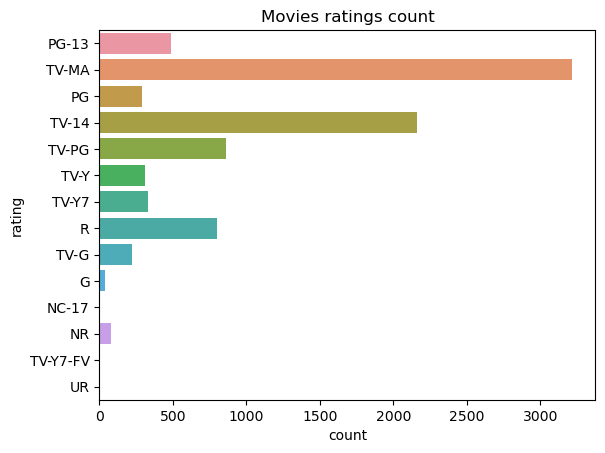

In [91]:
sns.countplot(data = df, y=df["rating"])
plt.title("Movies ratings count")
plt.show()

## Movies ratings
    Most data is TV-MA(mature audience only) and TV-14,which state most movies netflix should invest is of rating TV-MA & TV-14 as they are most worked
    

In [92]:
def func_plots(argu):
    df_temp_08 = df_new.groupby(["title","rating"])["country"].value_counts().to_frame("count_1").reset_index()
    plt1 = sns.countplot(data=df_temp_08[df_temp_08["rating"] == argu],x= "country")
    return plt1

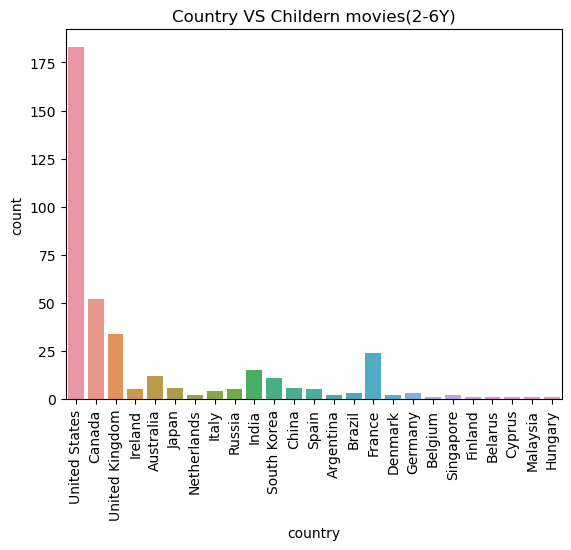

In [93]:
# plt.figure(figsize=(10,12))
# plt.subplot(2, 1, 1)
plt_1 = func_plots("TV-Y")
plt.xticks(rotation = 90)
plt.title("Country VS Childern movies(2-6Y)")
plt.show()

## TV_Y
    Most of  TV-Y(2-6 year age) are in United states, canada, uk and france,so must be available in these countries

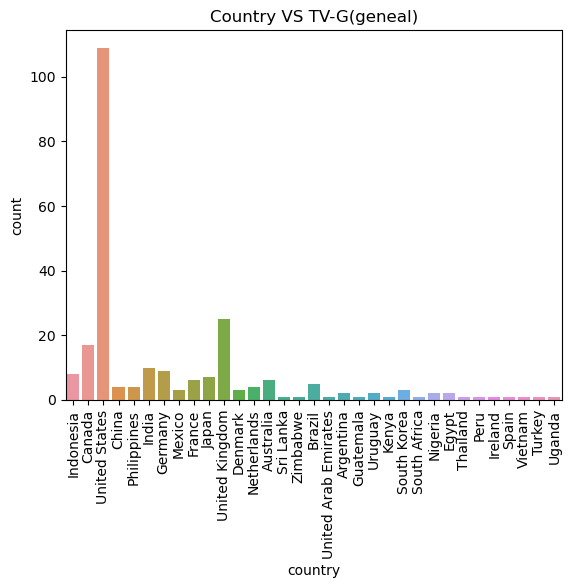

In [94]:
plt_1 = func_plots("TV-G")
plt.xticks(rotation = 90)
plt.title("Country VS TV-G(geneal)")
plt.show()

# 2) Inferences based on release year and date added

In [95]:
df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,nan,United States,2021-09-25,2020,PG-13,90,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,nan,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."


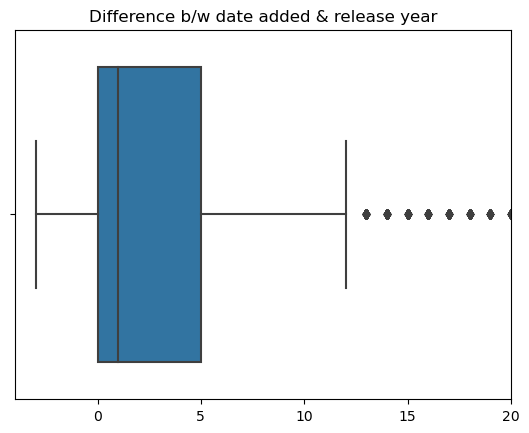

In [96]:
sns.boxplot(data =df, x =(df["date_added"].dt.year - df["release_year"]) )
plt.xlim(-4,20)
plt.title("Difference b/w date added & release year")
plt.show()

##  Gap in years b/w release date and date added
    Median is 1 year difference and 75 percentile data is 5 years difference, so netflix should try to add movies soon after release

# 3) Inferences based on genres

In [97]:
df_new.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Quincy Jones,United States,2021-09-25,2020,PG-13,90,Documentaries,"As her father nears the end of his life, filmm..."
1,s7,Movie,My Little Pony: A New Generation,Robert Cullen,Vanessa Hudgens,United States,2021-09-24,2021,PG,91,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...


In [98]:
df_movies_l = df_movies.groupby(["title","listed_in"])["type"].value_counts().to_frame("count_1").reset_index()
df_series_l = df_series.groupby(["title","listed_in"])["type"].value_counts().to_frame("count_1").reset_index()

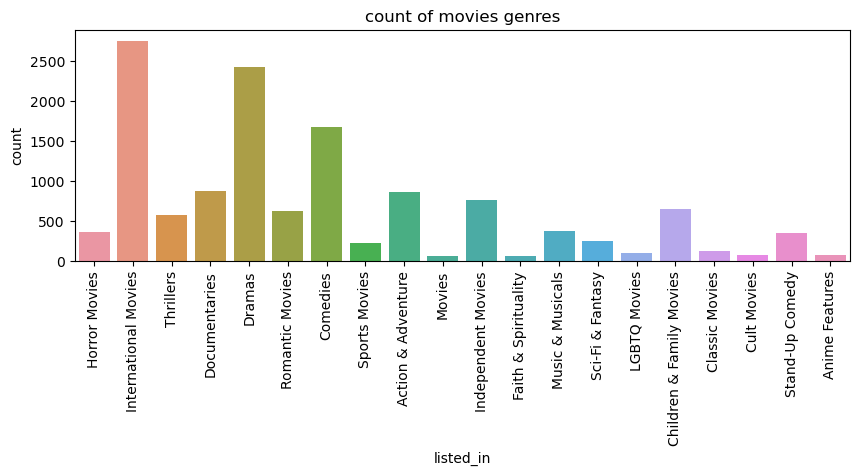

In [99]:
plt.figure(figsize=(10,3))
sns.countplot(data= df_movies_l, x= df_movies_l["listed_in"])
plt.xticks(rotation = 90)
plt.title("count of movies genres")
plt.show()

## movies genres
    Netflix should invest more in Drama & comedy movies

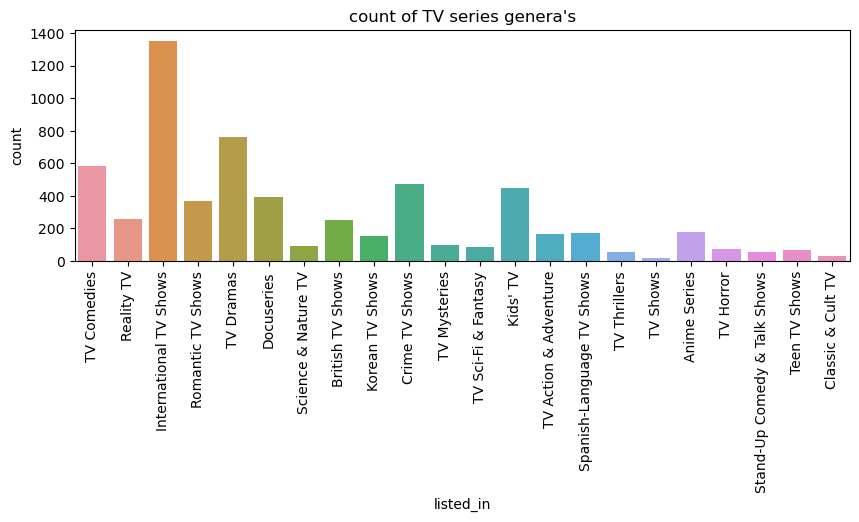

In [100]:
plt.figure(figsize=(10,3))
sns.countplot(data= df_series_l, x= df_series_l["listed_in"])
plt.xticks(rotation = 90)
plt.title("count of TV series genera's")
plt.show()

## Tv shows genres
    Netflix should invest more in Drama,comedy, kid's & crime tv shows

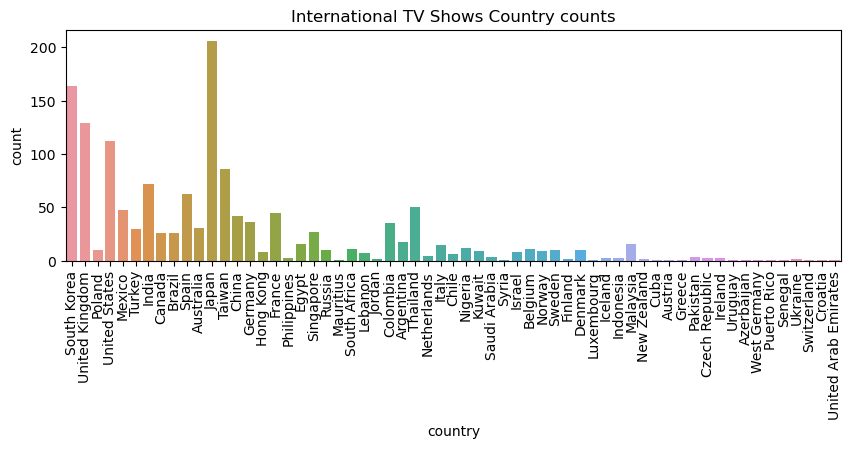

In [101]:
df9_m = df_movies.groupby(["title","listed_in"])["country"].value_counts().to_frame("count_1").reset_index()
df9_s = df_series.groupby(["title","listed_in"])["country"].value_counts().to_frame("count_1").reset_index()
d9 = df9_s[df9_s["listed_in"] == "International TV Shows"]
plt.figure(figsize=(10,3))
sns.countplot(data= d9, x= d9["country"])
plt.xticks(rotation = 90)
plt.title("International TV Shows Country counts")
plt.show()
d9 = df9_s[df9_s["listed_in"] == "International TV Shows"]

In [102]:
top_3countries = df_new.groupby(["title"])["country"].value_counts().to_frame("count_1").reset_index()["country"].value_counts().sort_values(ascending = False).index[:3]
top_3countries

Index(['United States', 'India', 'United Kingdom'], dtype='object')

In [103]:
top_5genera = df_new.groupby(["title"])["listed_in"].value_counts().to_frame("count_1").reset_index()["listed_in"].value_counts().sort_values(ascending = False).index[:5]
top_5genera

Index(['International Movies', 'Dramas', 'Comedies', 'International TV Shows',
       'Documentaries'],
      dtype='object')

In [104]:
df_top3 = df_new[(df_new["country"].isin(top_3countries)) & (df_new["listed_in"].isin(top_5genera))]

# 4) Inferences from duration

(50.0, 150.0)

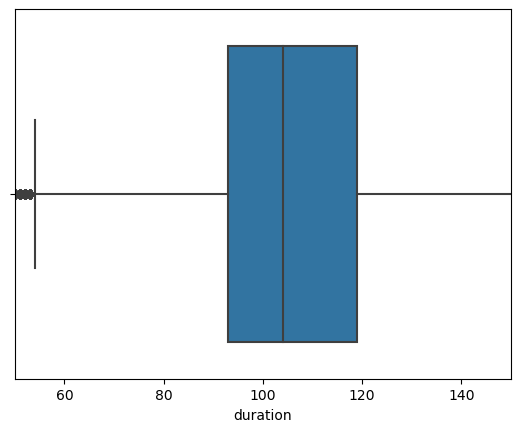

In [105]:
sns.boxplot(data = df_movies, x = df_movies["duration"])
plt.xlim(50,150)

## Duration of movies
    Ideal duration of movies should be 95-120 mins

<AxesSubplot:xlabel='count', ylabel='listed_in'>

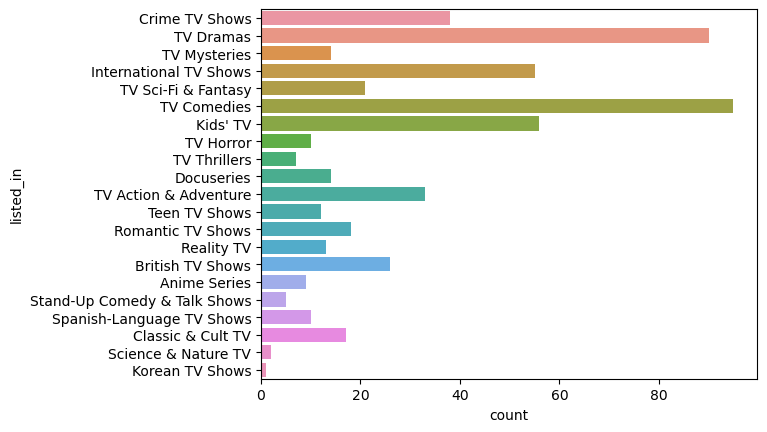

In [106]:
df_series_t = df_series[(df_series["duration"] >= 4)].groupby(["title","listed_in"])["type"].value_counts().to_frame("count_1").reset_index()
sns.countplot(data = df_series_t, y = "listed_in")

## Tv series franchie
    To create a successful tv series franchie, most likely they should from drama & comedy genere  

# 5) Inferences from Cast

In [107]:
df_new.groupby(["title", "cast"])["show_id"].value_counts().to_frame("c1").reset_index()["cast"].value_counts().sort_values(ascending=False)[:5]

Quincy Jones          264
David Attenborough    192
Anupam Kher            59
Takahiro Sakurai       56
Samuel West            52
Name: cast, dtype: int64

In [108]:
df_movies.groupby(["title", "cast"])["show_id"].value_counts().to_frame("c1").reset_index()["cast"].value_counts().sort_values(ascending=False)[:5]

Quincy Jones      264
Anupam Kher        58
Samuel West        50
Laura Bailey       37
Shah Rukh Khan     35
Name: cast, dtype: int64

In [109]:
df_series.groupby(["title", "cast"])["show_id"].value_counts().to_frame("c1").reset_index()["cast"].value_counts().sort_values(ascending=False)[:5]

David Attenborough    186
Takahiro Sakurai       49
Rutledge Wood          36
Vincent Tong           36
Yuki Kaji              19
Name: cast, dtype: int64

## Top movie stars
    Quincy Jones,Anupam Kher,Samuel West,Tara Strong and  Shah Rukh Khan are the top 5 most acted from data, so buy their movies.

## Top Tv series Stars
    David Attenborough,Takahiro Sakurai, Rutledge Wood, Vincent Tong and Yuki Kaji are the top 5 most acted from Tv Shows data, so buy their TV shows.

# 6) Inferences based on Country

<AxesSubplot:xlabel='count', ylabel='country'>

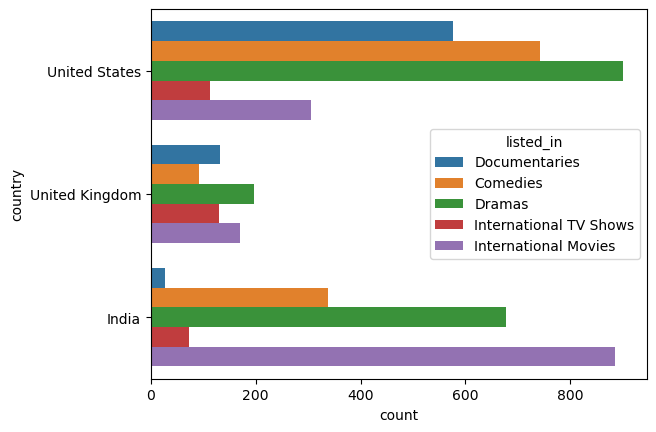

In [110]:
df_top3_tf = df_top3.groupby(["title","country"])["listed_in"].value_counts().to_frame("c1").reset_index()
sns.countplot(data=df_top3_tf, y="country", hue="listed_in")

## From top most 3 countries vs top most 5 genres
    1) united states (drama,comedy and documentries)
    2) India (drama,comedy, documentries)
    3) United Kingdom(drama, documnetries, comedy)
    so drama is most popular genere

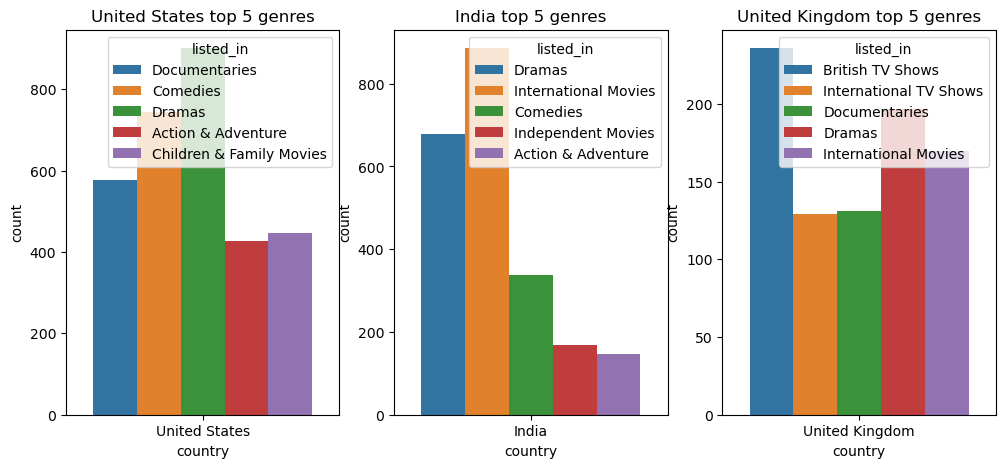

In [111]:
df_top3_t = df_new[df_new["country"].isin(top_3countries)]
df_top3_t = df_top3_t.groupby(["title","country"])["listed_in"].value_counts().to_frame("c1").reset_index()

def funct(ar):
    lst = df_top3_t.groupby(["country"])["listed_in"].value_counts()[ar].sort_values(ascending = False).index[:5]
    return lst

def funch(n,ct):
    plt.subplot(1,3,n)
    d_us = df_top3_t[(df_top3_t["country"] == ct) & (df_top3_t["listed_in"].isin(funct(ct)))]
    sns.countplot(data= d_us, x = "country", hue="listed_in")
    plt.title( ct +" top 5 genres")
    
plt.figure(figsize=(12,5))
funch(1,"United States")  
funch(2,"India")
funch(3,"United Kingdom")

plt.show()


## Top 3 country wise top 5 genres
    US, India, UK 's top 5 genres, so can target country wise releases

# 7) Inferences based on director

In [112]:
df_movies.groupby(["title", "director"]).count().reset_index()["director"].value_counts()[:5]

Martin Scorsese    105
Jan Suter           27
David Dhawan        25
Rajiv Chilaka       22
Sarah Smith         19
Name: director, dtype: int64

## Top 5 movie directors
    Martin Scorsese, Jan Suter, David Dhawan, Rajiv Chilaka and Sarah Smith are your top 5 directors, buy their movies if not already or plan movies with them 

# 8) Inferences from date added

In [113]:
def func_month(x):
    x["month"] = x["date_added"].month
    x["y_d"] = x["date_added"].year - x["release_year"]
    return x

# (df_new["type"] == m_s)
def func_month_ms(df_top3_d1, m_s,year_diff_bool):
    df_top3_d1 = df_top3_d1[(df_top3_d1["type"] == m_s)]
    if year_diff_bool:
        df_top3_d1 = df_top3_d1[df_top3_d1["y_d"] <= 1]
    else:
        df_top3_d1 = df_top3_d1[df_top3_d1["y_d"] > 1]
    df_top3_d1 = df_top3_d1.groupby(["title","country","date_added"])["month"].value_counts().to_frame("c1").reset_index()
    return df_top3_d1


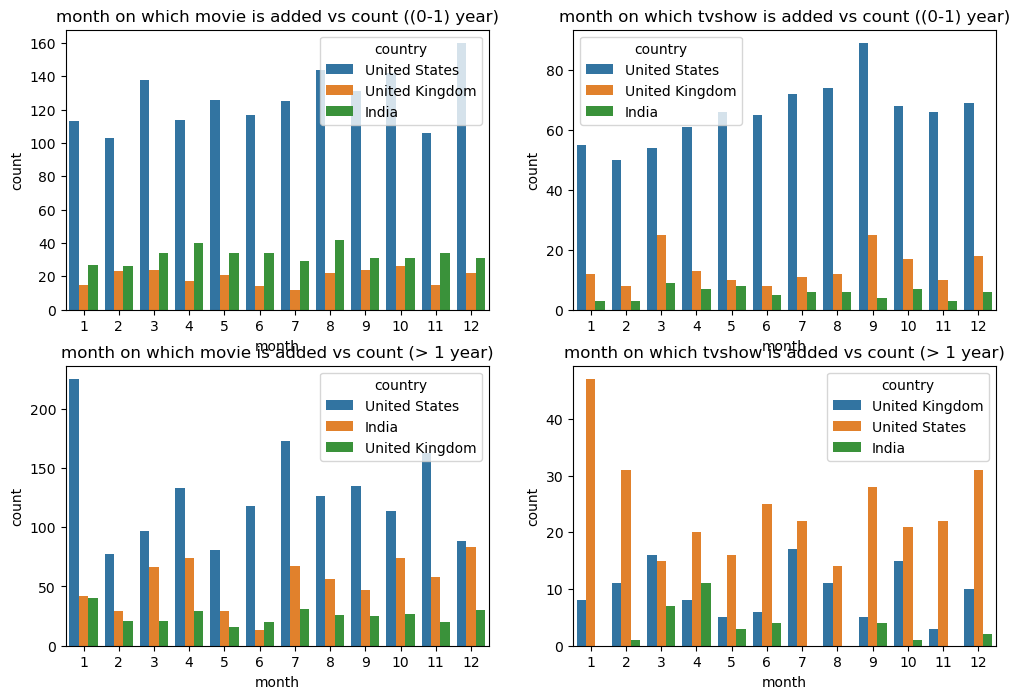

In [114]:
df_top3_d = df_new[(df_new["country"].isin(top_3countries))]
df_top3_d = df_top3_d.apply(func_month,axis = 1)
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
sns.countplot(data = func_month_ms(df_top3_d, "Movie", True), x = "month", hue="country")
plt.title("month on which movie is added vs count ((0-1) year)")
plt.subplot(2,2,2)
sns.countplot(data = func_month_ms(df_top3_d, "TV Show", True), x = "month", hue="country")
plt.title("month on which tvshow is added vs count ((0-1) year)")
plt.subplot(2,2,3)
sns.countplot(data = func_month_ms(df_top3_d, "Movie", False), x = "month", hue="country")
plt.title("month on which movie is added vs count (> 1 year)")
plt.subplot(2,2,4)
sns.countplot(data = func_month_ms(df_top3_d, "TV Show",False), x = "month", hue="country")
plt.title("month on which tvshow is added vs count (> 1 year)")
plt.show()

## most highest month with:
    For movies which are added on same year of release
        United states => december
        India => April and August
        UK =>August
    For TV series which are added on same year of release
        United states => September
        India => March and May
        UK =>March and September
    For movies which are added after 1 year of release
        United states => Jan and Nov
        India => April and Dec
        UK =>Jan
    For TV series which are added after 1 year of release
        United states => Jan and Dec
        India => April 
        UK => July
    which aligns with holiday seasons US(Nov-Jan), Uk(July-Sept) and India(march-May)
    so try release movies/Tv shows based above.

         

#### we can ignore International Movies and International TV Shows from genre 
    1) rows with only International Movies in genre is 3 out of 8807
    2) rows with International TV Shows in genre is 2 out of 8807
    3) International Movies in genre and United States in country is 166(6%)
    4) International Movies in genre and United States  not in country is 2583
    5) International TV Shows in genre and United States in country is 74(5%)
    6) nternational TV Shows in genre and United States not in country is 1275
    
    From the above data we can conclude that International Movies & TV Shows genre given are movies outside of United States.
     
    And We can ignore International Movies & TV Shows genre while making genre decisions

In [115]:
df[df["listed_in"] == "International Movies"].shape[0]

3

In [116]:
df[df["listed_in"] == "International TV Shows"].shape[0]

2

In [117]:
def func(x):
    if ("International Movies" in x["listed_in"]) and ("United States" in x["country"]):
        if len(x["listed_in"].split(",")) > 1:
            x["new"] = True
            return x
    x["new"] = False
    return x

df_IM = df.apply(func,axis = 1)

In [118]:
df_IM[df_IM["new"]].shape[0]

166

In [119]:
def func(x):
    if ("International Movies" in x["listed_in"]) and ("United States" not in x["country"]):
        if len(x["listed_in"].split(",")) > 1:
            x["new"] = True
            return x
    x["new"] = False
    return x

df_IM = df.apply(func,axis = 1)

In [120]:
df_IM[df_IM["new"]].shape[0]

2583

In [121]:
def func(x):
    if ("International TV Shows" in x["listed_in"])  and ("United States" in x["country"]):
        if len(x["listed_in"].split(",")) > 1:
            x["new"] = True
            return x
    x["new"] = False
    return x

df_IS = df.apply(func,axis = 1)

In [122]:
df_IS[df_IS["new"]].shape[0]

74

In [123]:
def func(x):
    if ("International TV Shows" in x["listed_in"])  and ("United States" not in x["country"]):
        if len(x["listed_in"].split(",")) > 1:
            x["new"] = True
            return x
    x["new"] = False
    return x

df_IS = df.apply(func,axis = 1)

In [124]:
df_IS[df_IS["new"]].shape[0]

1275